In [1]:
#initializing qiskit and libraries
from qiskit import *
import random
import pandas as pd
import numpy as np

In [2]:
from qiskit.circuit.library.standard_gates import XGate, CXGate

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')

In [6]:
sim_backend = provider.get_backend('ibmq_qasm_simulator')

In [7]:
n_q = 4
q = QuantumRegister(n_q)
c = ClassicalRegister(n_q)
circ = QuantumCircuit(q, c)

In [8]:
#randomizing between X and CX gates
gates = ['x0', 'x1']

In [9]:
#n is the no. of random circuits used
n_circ = 0
while n_circ < 100:
    circ = QuantumCircuit(q, c)
    #randomly choosing gates from list gates
    
    for i in range (10):
        gate = random.choice(gates)
        if gate == 'x0':
            circ.append(XGate(), [random.randint(0, n_q-1)])
        elif gate == 'x1':
            circ.append(CXGate(), random.sample(range(n_q), 2))
        
    
    #measuring the qubits
    circ.measure(q, c)
    job = execute(circ,backend = sim_backend, shots = 8192 )
    output = job.result()
    answer = output.get_counts(circ)
    if '1111' in answer.keys() and answer['1111'] > 7373 :
        print(answer)
        break
    n_circ += 1      
if n_circ < 100 :
    print('Hurray')
else :
    print('Better luck next time')

{'1111': 8192}
Hurray


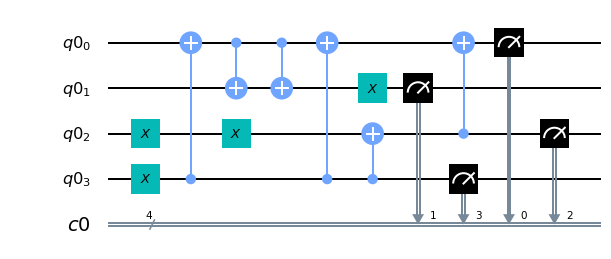

In [10]:
#plotting the circ 
%matplotlib inline 
circ.draw(output = 'mpl')

In [11]:
for i in range(0, n_q) :
    circ.data.pop(len(circ.data)-1)

In [12]:
np.set_printoptions(threshold=sys.maxsize)
import qiskit.quantum_info as qi
unitary = qi.Operator(circ)
print(unitary)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 